<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Start-the-Environment" data-toc-modified-id="1.-Start-the-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Start the Environment</a></span></li><li><span><a href="#2.-Examine-the-State-and-Action-Spaces" data-toc-modified-id="2.-Examine-the-State-and-Action-Spaces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Examine the State and Action Spaces</a></span></li><li><span><a href="#3.-Take-Random-Actions-in-the-Environment" data-toc-modified-id="3.-Take-Random-Actions-in-the-Environment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Take Random Actions in the Environment</a></span></li><li><span><a href="#4.-It's-Your-Turn!" data-toc-modified-id="4.-It's-Your-Turn!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. It's Your Turn!</a></span><ul class="toc-item"><li><span><a href="#Deep-Q-Network" data-toc-modified-id="Deep-Q-Network-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Deep Q-Network</a></span></li><li><span><a href="#Double-Deep-Q-Network" data-toc-modified-id="Double-Deep-Q-Network-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Double Deep Q-Network</a></span></li></ul></li><li><span><a href="#Try-Your-Agent" data-toc-modified-id="Try-Your-Agent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Try Your Agent</a></span></li></ul></div>

# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
from dqn_agent import Agent
from tqdm.notebook import tqdm
import torch

def dqn(n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, double=False, training=False):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_avg_score = 0
    for i_episode in tqdm(range(1, n_episodes+1)):
        env_info = env.reset(train_mode=training)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True: #for t in range(max_t):
            # select an action
            action = agent.act(state, eps)
            # send the action to the environment
            env_info = env.step(action)[brain_name]
            # get experience
            reward, next_state, done = env_info.rewards[0], env_info.vector_observations[0], env_info.local_done[0]
            agent.step(state, action, reward, next_state, done, double=double)
            # update the score
            score += reward
            state = next_state
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if len(scores_window) >= 100 and np.mean(scores_window) > 10 and max_avg_score < np.mean(scores_window):
            max_avg_score = np.mean(scores_window)
            print('\nModel updated at {:d} episode!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.Q_model_local.state_dict(), './model/model_{}.pt'.format(i_episode))
    return scores

#### Deep Q-Network

In [5]:
scores = dqn(training=True)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 2	Average Score: 0.50
Model updated at 2 episode!	Average Score: 0.50
Episode 13	Average Score: -0.23
Model updated at 13 episode!	Average Score: -0.23
Episode 21	Average Score: -0.14
Model updated at 21 episode!	Average Score: -0.14
Episode 56	Average Score: 0.204
Model updated at 56 episode!	Average Score: 0.20
Episode 57	Average Score: 0.28
Model updated at 57 episode!	Average Score: 0.28
Episode 70	Average Score: 0.50
Model updated at 70 episode!	Average Score: 0.50
Episode 100	Average Score: 0.84
Episode 133	Average Score: 1.89
Model updated at 133 episode!	Average Score: 1.89
Episode 159	Average Score: 2.84
Model updated at 159 episode!	Average Score: 2.84
Episode 200	Average Score: 4.17
Episode 210	Average Score: 4.65
Model updated at 210 episode!	Average Score: 4.65
Episode 212	Average Score: 4.73
Model updated at 212 episode!	Average Score: 4.73
Episode 214	Average Score: 4.93
Model updated at 214 episode!	Average Score: 4.93
Episode 300	Average Score: 7.34
Episode 342

NameError: name 'plt' is not defined

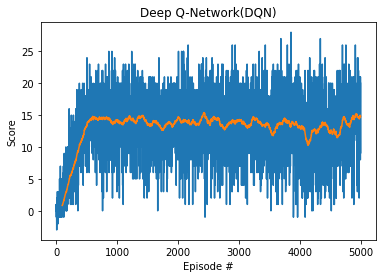

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

rolling_window = 100

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean);
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Deep Q-Network(DQN)')
plt.show()

In [16]:
env.close()

#### Double Deep Q-Network

Episode 100	Average Score: 0.76
Episode 200	Average Score: 3.29
Episode 300	Average Score: 7.20
Episode 400	Average Score: 9.88
Episode 415	Average Score: 10.14
Model updated at 415 episode!	Average Score: 10.14
Episode 416	Average Score: 10.15
Model updated at 416 episode!	Average Score: 10.15
Episode 422	Average Score: 10.17
Model updated at 422 episode!	Average Score: 10.17
Episode 423	Average Score: 10.22
Model updated at 423 episode!	Average Score: 10.22
Episode 426	Average Score: 10.31
Model updated at 426 episode!	Average Score: 10.31
Episode 429	Average Score: 10.33
Model updated at 429 episode!	Average Score: 10.33
Episode 430	Average Score: 10.36
Model updated at 430 episode!	Average Score: 10.36
Episode 432	Average Score: 10.42
Model updated at 432 episode!	Average Score: 10.42
Episode 433	Average Score: 10.51
Model updated at 433 episode!	Average Score: 10.51
Episode 434	Average Score: 10.52
Model updated at 434 episode!	Average Score: 10.52
Episode 435	Average Score: 10.53

Episode 2600	Average Score: 12.98
Episode 2700	Average Score: 12.84
Episode 2800	Average Score: 12.59
Episode 2900	Average Score: 12.38
Episode 3000	Average Score: 12.65
Episode 3100	Average Score: 12.02
Episode 3200	Average Score: 12.21
Episode 3300	Average Score: 12.99
Episode 3400	Average Score: 11.51
Episode 3500	Average Score: 11.84
Episode 3600	Average Score: 12.29
Episode 3700	Average Score: 12.88
Episode 3800	Average Score: 12.45
Episode 3900	Average Score: 12.71
Episode 4000	Average Score: 12.59
Episode 4100	Average Score: 12.49
Episode 4200	Average Score: 12.33
Episode 4300	Average Score: 11.86
Episode 4400	Average Score: 12.77
Episode 4500	Average Score: 13.48
Episode 4600	Average Score: 13.37
Episode 4700	Average Score: 12.70
Episode 4800	Average Score: 12.81
Episode 4900	Average Score: 13.05
Episode 5000	Average Score: 13.14



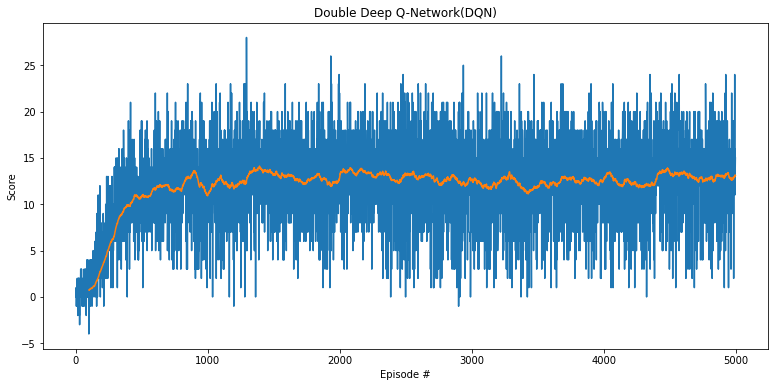

In [6]:
scores = dqn(double=True, training=True)

rolling_window = 100

# plot the scores
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Double Deep Q-Network(DQN)')
plt.show()

In [ ]:
scores = dqn(double=True, training=True)

rolling_window = 100

# plot the scores
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
plt.plot(rolling_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Double Deep Q-Network(DQN)')
plt.show()

Episode 100	Average Score: 0.51
Episode 200	Average Score: 1.99
Episode 300	Average Score: 4.70
Episode 400	Average Score: 9.23
Episode 412	Average Score: 10.02
Model updated at 412 episode!	Average Score: 10.02
Episode 413	Average Score: 10.05
Model updated at 413 episode!	Average Score: 10.05
Episode 414	Average Score: 10.11
Model updated at 414 episode!	Average Score: 10.11
Episode 415	Average Score: 10.21
Model updated at 415 episode!	Average Score: 10.21
Episode 416	Average Score: 10.25
Model updated at 416 episode!	Average Score: 10.25
Episode 417	Average Score: 10.28
Model updated at 417 episode!	Average Score: 10.28
Episode 418	Average Score: 10.38
Model updated at 418 episode!	Average Score: 10.38
Episode 419	Average Score: 10.41
Model updated at 419 episode!	Average Score: 10.41
Episode 420	Average Score: 10.53
Model updated at 420 episode!	Average Score: 10.53
Episode 421	Average Score: 10.55
Model updated at 421 episode!	Average Score: 10.55
Episode 422	Average Score: 10.58

Episode 855	Average Score: 15.09
Model updated at 855 episode!	Average Score: 15.09
Episode 856	Average Score: 15.10
Model updated at 856 episode!	Average Score: 15.10
Episode 857	Average Score: 15.21
Model updated at 857 episode!	Average Score: 15.21
Episode 864	Average Score: 15.23
Model updated at 864 episode!	Average Score: 15.23
Episode 865	Average Score: 15.32
Model updated at 865 episode!	Average Score: 15.32
Episode 868	Average Score: 15.34
Model updated at 868 episode!	Average Score: 15.34
Episode 900	Average Score: 15.01
Episode 952	Average Score: 15.37
Model updated at 952 episode!	Average Score: 15.37
Episode 1000	Average Score: 14.79
Episode 1100	Average Score: 13.91
Episode 1200	Average Score: 13.65
Episode 1300	Average Score: 14.58
Episode 1400	Average Score: 14.38
Episode 1500	Average Score: 14.86
Episode 1600	Average Score: 14.51
Episode 1700	Average Score: 14.33
Episode 1800	Average Score: 13.99
Episode 1900	Average Score: 13.64
Episode 2000	Average Score: 13.42
Episo

### Try Your Agent

In [10]:
from dqn_agent import Agent

episode_no = 1393
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.Q_model_local.load_state_dict(torch.load('./model_DDQN_woDO/model_{}.pt'.format(episode_no)))
max_episode = 10

for episode in range(max_episode):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, 1)                   # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Episode {:02d}, Score: {}".format(episode, score))

Score: 1.0
